In [66]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'AppleGothic'
# import tensorflow as tf
# import keras
from numpy import array
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import matplotlib as mpl
from IPython.core.display import display, HTML
from datetime import datetime
from datetime import timedelta
from dateutil.relativedelta import relativedelta
from sklearn.preprocessing import MinMaxScaler, RobustScaler
# from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
# from tensorflow.keras import Sequential
# from tensorflow.keras import layers
# from tensorflow.keras.layers import Dense, LSTM, Dropout
# from keras.callbacks import ModelCheckpoint, EarlyStopping
# from statsmodels.tsa.seasonal import seasonal_decompose, STL
import urllib.request
import requests
import json
import datetime
import os
from datetime import datetime
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
from tqdm import tqdm
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

# 0. 데이터셋(dataset)

**train** 20160101 ~ 20200928 <br> 
**test** 20200929 ~ 20201105

EDA와 기본 모델을 만들때 사용 <br>
train + test 합친 프레임(토마토, 포도) = df

In [67]:
# Macbook
raw_path = '/Users/goeun/Documents/YearDream/ProJect/kurly_project/products_price_predict/data/raw/'
processed_path = '/Users/goeun/Documents/YearDream/ProJect/kurly_project/products_price_predict/data/processed/'

In [5]:
# iMACA
# raw_path = '/Users/cge/Documents/yeardream/프로젝트/기업프로젝트/products_price_predict/data/raw/'
# processed_path = '/Users/cge/Documents/yeardream/프로젝트/기업프로젝트/products_price_predict/data/processed/'

In [68]:
# train = pd.read_csv(raw_path + 'train.csv')
# test = pd.read_csv(raw_path + 'test.csv')
df = pd.read_csv(processed_path + 'test.csv')

private = pd.read_csv(raw_path +'preprocessing.csv')

FileNotFoundError: [Errno 2] No such file or directory: '/Users/goeun/Documents/YearDream/ProJect/kurly_project/products_price_predict/data/processed/test.csv'

In [13]:
df = df_private[['date', '요일','대파_거래량(kg)', '대파_가격(원/kg)','깻잎_거래량(kg)', '깻잎_가격(원/kg)','팽이버섯_거래량(kg)', '팽이버섯_가격(원/kg)',
        '토마토_거래량(kg)', '토마토_가격(원/kg)','캠벨얼리_거래량(kg)', '캠벨얼리_가격(원/kg)']]

In [12]:
preprocessing = df.copy()
print(preprocessing.shape)
preprocessing.head(2)

(1771, 12)


,date,요일,대파_거래량(kg),대파_가격(원/kg),깻잎_거래량(kg),깻잎_가격(원/kg),팽이버섯_거래량(kg),팽이버섯_가격(원/kg),토마토_거래량(kg),토마토_가격(원/kg),캠벨얼리_거래량(kg),캠벨얼리_가격(원/kg)
0,2016-01-01,금요일,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2016-01-02,토요일,92334.0,1704.0,4374.9,13242.0,14634.0,1474.0,30950.0,1621.0,880.0,2014.0


In [18]:
preprocessing.describe()

,대파_거래량(kg),대파_가격(원/kg),깻잎_거래량(kg),깻잎_가격(원/kg),팽이버섯_거래량(kg),팽이버섯_가격(원/kg),토마토_거래량(kg),토마토_가격(원/kg),캠벨얼리_거래량(kg),캠벨얼리_가격(원/kg),월,년,계절
count,1.771000e+03,1771.000000,1771.000000,1771.000000,1771.000000,1771.000000,1.771000e+03,1771.000000,1.771000e+03,1771.000000,1771.000000,1771.000000,1771.000000
mean,5.697315e+05,1177.678713,80191.005985,4605.608696,104064.686053,1422.367589,3.159252e+05,1879.954828,1.179757e+05,3179.187566,6.361942,2017.936759,1.507623
std,2.714085e+05,664.335723,40836.830916,2726.123428,47354.221027,806.591677,2.387288e+05,1137.719470,2.444185e+05,2052.713879,3.383158,1.391442,1.100757
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,1.000000,2016.000000,0.000000
25%,5.522209e+05,854.000000,71226.400000,3393.000000,109722.000000,1072.500000,1.616290e+05,1175.000000,9.960000e+02,2059.000000,3.000000,2017.000000,1.000000
50%,6.490364e+05,1197.000000,88521.600000,4505.000000,121314.000000,1454.000000,2.643095e+05,1904.000000,4.697000e+03,3278.000000,6.000000,2018.000000,2.000000
75%,7.274476e+05,1580.000000,103705.050000,5927.000000,130871.000000,1918.500000,4.581825e+05,2672.500000,7.813610e+04,4273.500000,9.000000,2019.000000,2.000000
max,1.302729e+06,3784.000000,256450.400000,14326.000000,169256.000000,3951.000000,1.279844e+06,7348.000000,1.490337e+06,12519.000000,12.000000,2020.000000,3.000000


In [15]:
preprocessing.date = pd.to_datetime(preprocessing.date)
preprocessing['월'] = preprocessing['date'].dt.month 
preprocessing['년'] = preprocessing['date'].dt.year 

# 계절 = 0: 겨울(12~2월) // 1 : 봄(3~5월) // 2: 여름(6~8월) // 3: 가을(9~11월)
preprocessing['계절'] = (preprocessing['월'] // 3 % 4) 
# preprocessing.drop(columns=['월','년'], inplace=True)
print(preprocessing.shape)
preprocessing.head(2)

(1771, 15)


,date,요일,대파_거래량(kg),대파_가격(원/kg),깻잎_거래량(kg),깻잎_가격(원/kg),팽이버섯_거래량(kg),팽이버섯_가격(원/kg),토마토_거래량(kg),토마토_가격(원/kg),캠벨얼리_거래량(kg),캠벨얼리_가격(원/kg),월,년,계절
0,2016-01-01,금요일,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,2016,0
1,2016-01-02,토요일,92334.0,1704.0,4374.9,13242.0,14634.0,1474.0,30950.0,1621.0,880.0,2014.0,1,2016,0


(array([261.,  82., 453., 486., 217., 139.,  71.,  43.,  10.,   9.]),
 array([    0. ,  1432.6,  2865.2,  4297.8,  5730.4,  7163. ,  8595.6,
        10028.2, 11460.8, 12893.4, 14326. ]),
 <BarContainer object of 10 artists>)

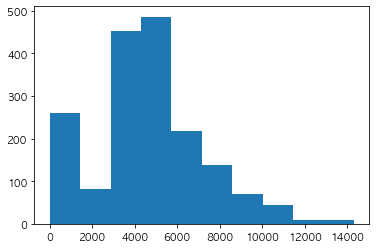

In [29]:
plt.hist(df['깻잎_가격(원/kg)' ])

<AxesSubplot:>

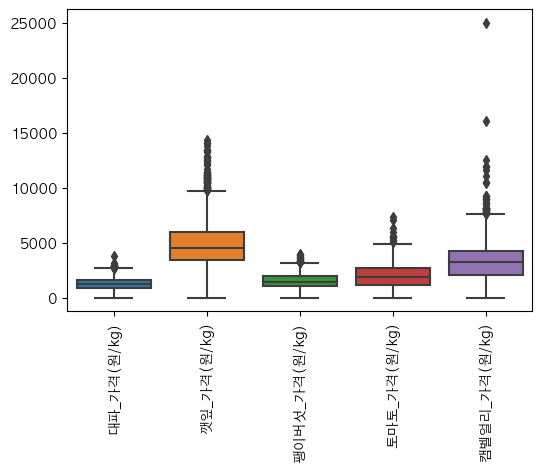

In [40]:
feature = df[['대파_가격(원/kg)','깻잎_가격(원/kg)','팽이버섯_가격(원/kg)','토마토_가격(원/kg)','캠벨얼리_가격(원/kg)' ]].columns

fig = plt.figure(dpi=100)
plt.xticks(rotation = 90)
sns.boxplot(data = df[feature])

# 캠벨얼리만 전처리하자!

## 캠벨얼리 전처리  15000 이상 (max)을 기준으로 
FTA와 태풍으로 인한 가격 폭등<br>
 -> 외부 날씨의 영향등 예측 불가한 사유에 해당하여 대체할 수 있는 컬럼이 없어 해당 월의 평균으로 대체함

In [17]:
preprocessing[preprocessing['캠벨얼리_가격(원/kg)'] > 15000]
print(round(preprocessing.loc[(preprocessing['계절'] == 1)&(preprocessing['년'] == 2016),'캠벨얼리_가격(원/kg)'].mean(), 2))
print(round(preprocessing.loc[(preprocessing['계절'] == 0)&(preprocessing['년'] == 2020),'캠벨얼리_가격(원/kg)'].mean(), 2))
preprocessing.loc[122, '캠벨얼리_가격(원/kg)'] = 4059.98
preprocessing.loc[1501, '캠벨얼리_가격(원/kg)'] = 4490.2

4059.98
4490.2


In [55]:
preprocessing.to_csv(processed_path+'preprocessing.csv', index= 0)

### 1, 2주전 거래량 & 가격 파생변수 생성

In [53]:
preprocessing_1106 = preprocessing[1770:]
preprocessing_1106

,date,요일,대파_거래량(kg),대파_가격(원/kg),깻잎_거래량(kg),깻잎_가격(원/kg),팽이버섯_거래량(kg),팽이버섯_가격(원/kg),토마토_거래량(kg),토마토_가격(원/kg),캠벨얼리_거래량(kg),캠벨얼리_가격(원/kg),월,년,계절
1770,2020-11-06,금요일,656754.3,2402.0,79001.9,4831.0,134141.5,1408.0,257987.1,2806.0,23697.0,2797.0,11,2020,3


In [64]:
# 1주 전 가격들의 평균내기(월~일, 0으로 된 날 개수 세는 코드와 그에 따른 평균 내는 코드로)
# index 기준 10~16, 17~23, ...
# index 기준 0~9는 농넷에서 찾아야 할 듯 합니다. so 2015년 12월 28부터 2015년 12월 31일까지 4일간의 데이터 찾아보자.

A = [];B = []
for x in range(10):
    A.append(0)
    B.append(0)

for y in range(246):
    s = 0;t = 0
    for z in range(7):
        s += preprocessing['팽이버섯_거래량(kg)'].iloc[(y * 7) + z + 3]
        t += preprocessing['팽이버섯_가격(원/kg)'].iloc[(y * 7) + z + 3]
    v_1 = (preprocessing['팽이버섯_거래량(kg)'].iloc[(y * 7) + 3:(y * 7) + 10] == 0).sum()
    v_2 = (preprocessing['팽이버섯_가격(원/kg)'].iloc[(y * 7) + 3:(y * 7) + 10] == 0).sum()
    for w in range(7):
        A.append(s / (7 - v_1))
        B.append(t / (7 - v_2))
for z in range(7):
    s += preprocessing['팽이버섯_거래량(kg)'].iloc[1725 + z]
    t += preprocessing['팽이버섯_가격(원/kg)'].iloc[1725 + z]
v_1 = (preprocessing['팽이버섯_거래량(kg)'].iloc[1725:1771] == 0).sum()
v_2 = (preprocessing['팽이버섯_가격(원/kg)'].iloc[1725:1771] == 0).sum()
A.append(s / (7 - v_1))
B.append(t / (7 - v_2))
Adf = pd.DataFrame(A, columns = ['팽이버섯_거래량의_1주전_평균'])
Bdf = pd.DataFrame(B, columns = ['팽이버섯_가격의_1주전_평균'])
preprocessing_1 = pd.concat([preprocessing_1106, Adf, Bdf], axis=1)
# preprocessing_1

In [65]:
preprocessing_1

,date,요일,대파_거래량(kg),대파_가격(원/kg),깻잎_거래량(kg),깻잎_가격(원/kg),팽이버섯_거래량(kg),팽이버섯_가격(원/kg),토마토_거래량(kg),토마토_가격(원/kg),캠벨얼리_거래량(kg),캠벨얼리_가격(원/kg),월,년,계절,팽이버섯_거래량의_1주전_평균,팽이버섯_가격의_1주전_평균
1770,2020-11-06,금요일,656754.3,2402.0,79001.9,4831.0,134141.5,1408.0,257987.1,2806.0,23697.0,2797.0,11.0,2020.0,3.0,NaN,NaN
0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0.000000
1,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0.000000
2,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0.000000
3,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1728,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.312031e+05,2160.666667
1729,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.312031e+05,2160.666667
1730,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.312031e+05,2160.666667
1731,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.312031e+05,2160.666667


In [ ]:
# 2주 전 가격들의 평균내기(월~일, 0으로 된 날 개수 세는 코드와 그에 따른 평균 내는 코드로)
# index 기준 10~23, 24~37, ...
# index 기준 0~16는 농넷에서 찾아야 할 듯 합니다. so 2015년 12월 21부터 2015년 12월 31일까지 11일간의 데이터 찾아보자.

C = [];D = []
for x in range(17):
    C.append(0)
    D.append(0)

for y in range(245):
    s = 0;t = 0
    for z in range(14):
        s += preprocessing['팽이버섯_거래량(kg)'].iloc[(y * 7) + z + 3]
        t += preprocessing['팽이버섯_가격(원/kg)'].iloc[(y * 7) + z + 3]
    v_1 = (preprocessing['팽이버섯_거래량(kg)'].iloc[(y * 7) + 3:(y * 7) + 17] == 0).sum()
    v_2 = (preprocessing['팽이버섯_가격(원/kg)'].iloc[(y * 7) + 3:(y * 7) + 17] == 0).sum()
    for w in range(7):
        C.append(s / (14 - v_1))
        D.append(t / (14 - v_2))
for z in range(14):
    s += preprocessing['팽이버섯_거래량(kg)'].iloc[1718 + z]
    t += preprocessing['팽이버섯_가격(원/kg)'].iloc[1718 + z]
v_1 = (preprocessing['팽이버섯_거래량(kg)'].iloc[1718:1732] == 0).sum()
v_2 = (preprocessing['팽이버섯_가격(원/kg)'].iloc[1718:1732] == 0).sum()
C.append(s / (14 - v_1))
D.append(t / (14 - v_2))
Cdf = pd.DataFrame(C, columns = ['팽이버섯_거래량의_2주전_평균'])
Ddf = pd.DataFrame(D, columns = ['팽이버섯_가격의_2주전_평균'])
preprocessing_2 = pd.concat([preprocessing_1, Cdf, Ddf], axis=1)
# preprocessing_2

In [ ]:
# 계절 = 0: 겨울(12~2월) // 1 : 봄(3~5월) // 2: 여름(6~8월) // 3: 가을(9~11월)
preprocessing_2.계절.value_counts()

1    460
2    460
3    429
0    421
Name: 계절, dtype: int64

In [ ]:
preprocessing_2.isna().sum()

date                0
요일                  0
팽이버섯_거래량(kg)        0
팽이버섯_가격(원/kg)       0
월                   0
년                   0
계절                  0
팽이버섯_거래량의_1주전_평균    0
팽이버섯_가격의_1주전_평균     0
팽이버섯_거래량의_2주전_평균    0
팽이버섯_가격의_2주전_평균     0
dtype: int64

In [ ]:
# 샤인머스켓 결측치 0으로 대체
preprocessing_2 = preprocessing_2.fillna(0)

In [ ]:
# 계절별 평균가격
print(preprocessing_2.loc[preprocessing_2.계절 == 0, '팽이버섯_가격(원/kg)'].mean())
print(preprocessing_2.loc[preprocessing_2.계절 == 1, '팽이버섯_가격(원/kg)'].mean())
print(preprocessing_2.loc[preprocessing_2.계절 == 2, '팽이버섯_가격(원/kg)'].mean())
print(preprocessing_2.loc[preprocessing_2.계절 == 3, '팽이버섯_가격(원/kg)'].mean())

# 계절별 평균거래량
print()
print(preprocessing_2.loc[preprocessing_2.계절 == 0, '팽이버섯_거래량(kg)'].mean())
print(preprocessing_2.loc[preprocessing_2.계절 == 1, '팽이버섯_거래량(kg)'].mean())
print(preprocessing_2.loc[preprocessing_2.계절 == 2, '팽이버섯_거래량(kg)'].mean())
print(preprocessing_2.loc[preprocessing_2.계절 == 3, '팽이버섯_거래량(kg)'].mean())

1557.7790973871734
1238.0326086956522
1149.4782608695652
1779.7785547785547

102945.13420427547
110413.1539130435
103169.8615217391
99245.52191142189


In [ ]:
preprocessing_2.columns

Index(['date', '요일', '팽이버섯_거래량(kg)', '팽이버섯_가격(원/kg)', '월', '년', '계절',
       '팽이버섯_거래량의_1주전_평균', '팽이버섯_가격의_1주전_평균', '팽이버섯_거래량의_2주전_평균',
       '팽이버섯_가격의_2주전_평균'],
      dtype='object')

## 캠벨얼리, 샤인머스켓 파일저장

In [ ]:
mushroom_preprocessed = preprocessing_2[['date', '요일', '팽이버섯_거래량(kg)', '팽이버섯_가격(원/kg)', 
                           '팽이버섯_거래량의_1주전_평균', '팽이버섯_가격의_1주전_평균', '팽이버섯_거래량의_2주전_평균',
                           '팽이버섯_가격의_2주전_평균','계절']]
mushroom_preprocessed.shape

(1770, 9)

In [ ]:
mushroom_preprocessed.to_csv(processed_path+'팽이버섯_전처리후.csv', index = False)